<a href="https://colab.research.google.com/github/glaytonpauladev/firerobot/blob/main/dados_queimadas_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install pyogrio

In [100]:
# prompt: importar biblioteca geopandas
from osgeo import gdal
import geopandas as gpd
import pandas as pd
import pyogrio;

In [70]:
qsp = gpd.read_file('focos_qmd_inpe_2024-03-22_2024-03-23.shp', engine='pyogrio')

In [71]:
qsp.head()

geometry
0  POINT (-61.11770 3.51040)
1  POINT (-61.09910 3.49220)
2  POINT (-61.71040 3.05250)
3  POINT (-61.59880 2.96140)
4  POINT (-60.27440 2.92790)

In [94]:
qsp['geometry'].size

704

In [89]:
qsp.dtypes

geometry    geometry
dtype: object

<Axes: >

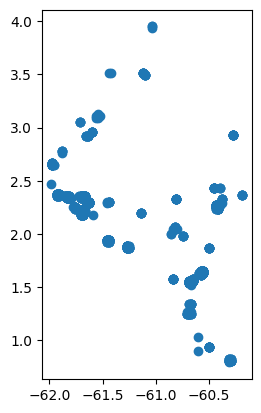

In [73]:
qsp.plot()

In [74]:
brshape = gpd.read_file('dashboard_states-static-layer.shp', engine='pyogrio')

In [87]:
brshape.head()

geometry
0  MULTIPOLYGON (((-37.98248 -11.34818, -37.98253...
1  MULTIPOLYGON (((-44.48155 -2.72660, -44.47867 ...
2  MULTIPOLYGON (((-29.33711 -20.48802, -29.33686...
3  POLYGON ((-69.61341 -2.44025, -69.53446 -2.000...
4  POLYGON ((-63.97805 2.46754, -63.97871 2.46840...

In [84]:
brshape.dtypes

geometry    geometry
dtype: object

In [99]:
brshape.size

27

<Axes: >

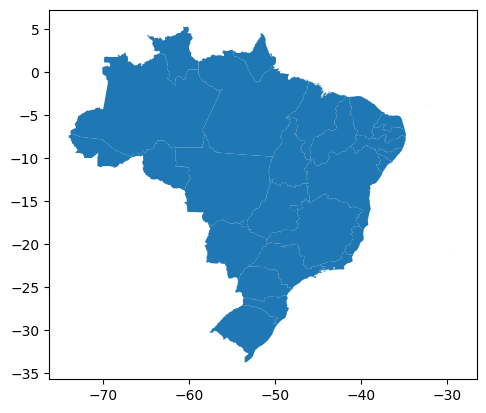

In [75]:
brshape.plot()

In [102]:
dfq = pd.read_csv('focos_qmd_inpe_2024-03-22_2024-03-23.csv')

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [104]:
dfq = dfq[dfq['RiscoFogo'].notnull() & dfq['Precipitacao'].notnull() & dfq['DiaSemChuva'].notnull()]


In [105]:
dfq.head()

DataHora Satelite    Pais   Estado    Municipio     Bioma  \
8189  2024/03/22 00:04:43  GOES-16  Brasil  RORAIMA      AMAJARI  Amazônia   
8190  2024/03/22 00:04:46  GOES-16  Brasil  RORAIMA  ALTO ALEGRE  Amazônia   
8191  2024/03/22 00:04:46  GOES-16  Brasil  RORAIMA  ALTO ALEGRE  Amazônia   
8192  2024/03/22 00:04:46  GOES-16  Brasil  RORAIMA  ALTO ALEGRE  Amazônia   
8193  2024/03/22 00:04:48  GOES-16  Brasil  RORAIMA  ALTO ALEGRE  Amazônia   

      DiaSemChuva  Precipitacao  RiscoFogo  Latitude  Longitude    FRP  
8189          5.0           0.0       0.98    3.6916   -61.6808   54.7  
8190          5.0           0.0       1.00    3.1439   -61.6148   58.1  
8191          5.0           0.0       1.00    3.1257   -61.6151  124.7  
8192          5.0           0.0       1.00    3.1257   -61.5962   75.3  
8193         15.0           0.0       1.00    2.8150   -61.8080   64.3

In [106]:
dfq.size

132900

In [111]:
X = dfq[['DiaSemChuva', 'Precipitacao', 'Latitude', 'Longitude']]
y = dfq['RiscoFogo']


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)